In [0]:
import numpy as np
import pandas as pd

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1CmI37GcFdB4WCjmANeCYfJe7SuYfqOOX'
fluff1, id1 = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('train_fakeNews.csv')

<built-in function id>


In [0]:
link = 'https://drive.google.com/open?id=18z6S7CzSPgTT7Csj44jeT6M42B3xSek1'
fluff1, id1 = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('test_fakeNews.csv')

<built-in function id>


In [0]:
train_data = '/content/train_fakeNews.csv'
test_data = '/content/test_fakeNews.csv'

In [0]:
# cols = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 
#             'speakerjobtitle', 'stateinfo','partyaffiliation', 
#             'barelytruecounts', 'falsecounts','halftruecounts',
#             'mostlytrueocounts','pantsonfirecounts','context']

In [0]:
df_train = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)

In [0]:
df_train['label'].unique()

array([1, 0])

In [0]:
# t_labels1 = ['pants-fire']
# t_labels2 = ['false']
# t_labels3 = ['barely-true']
# t_labels4 = ['half-true']
# t_labels5 = ['mostly-true']
# t_labels6 = ['true']
# def convert_Label(i):
#   if i in t_labels1:
#     return 0
#   elif i in t_labels2:
#     return 1
#   elif i in t_labels3:
#     return 2
#   elif i in t_labels4:
#     return 3
#   elif i in t_labels5:
#     return 4
#   else:
#     return 5

In [0]:
# df_train['labelEncoded'] = df_train.apply(lambda row: convert_Label(row['label']), axis=1)
# df_test['labelEncoded'] = df_test.apply(lambda row: convert_Label(row['label']), axis=1)

In [0]:
# df_train['labelEncoded']

In [0]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [0]:
df_mod= df_train[['title','text','label']]

In [0]:
df_mod['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [0]:
df_mod['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import string
def remove_punctuations(data):
    d = "".join([i for i in str(data) if i not in string.punctuation])
    return d

In [0]:
remove_punctuations('hello-madam')

'hellomadam'

In [0]:
from nltk.tokenize import RegexpTokenizer
def tokenize(data):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(data.lower())

In [0]:
tokenize('DEEP LEARNING  model')

['deep', 'learning', 'model']

In [0]:
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(data):
    data = [i for i in data if i not in stopwords.words('english')]
    return data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
remove_stopwords(['deep', 'is' ,'good'])

['deep', 'good']

In [0]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

def lematize(data):
    data = [lemma.lemmatize(i) for i in data]
    return data

In [0]:
lematize(['plays'])

['play']

In [0]:
from nltk.stem.porter import PorterStemmer
stemming = PorterStemmer()
def stem(data):
    data = " ".join([stemming.stem(i) for i in data])
    return data

In [0]:
stem(['playing'])

'play'

In [0]:
df_mod['finalHeaderBody'] = df_mod.apply(lambda row: remove_punctuations(row['text']), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_mod['finalHeaderBody'] = df_mod.apply(lambda row: tokenize(row['finalHeaderBody']), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# df_mod['finalHeaderBody'] = df_mod.apply(lambda row: remove_stopwords(row['finalHeaderBody']), axis=1)

In [0]:
df_mod['finalHeaderBody'] = df_mod.apply(lambda row: lematize(row['finalHeaderBody']), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_mod['finalHeaderBody'] = df_mod.apply(lambda row: stem(row['finalHeaderBody']), axis=1)

In [0]:
df_mod['finalTitle'] = df_mod.apply(lambda row: remove_punctuations(row['title']), axis=1)

df_mod['finalTitle'] = df_mod.apply(lambda row: tokenize(row['finalTitle']), axis=1)

# df_mod['finalHeaderBody'] = df_mod.apply(lambda row: remove_stopwords(row['finalHeaderBody']), axis=1)

df_mod['finalTitle'] = df_mod.apply(lambda row: lematize(row['finalTitle']), axis=1)

df_mod['finalTitle'] = df_mod.apply(lambda row: stem(row['finalTitle']), axis=1)

In [0]:
df_mod

,title,text,label,finalHeaderBody,finalTitle
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid we didn t even see comey s letter...,hous dem aid we didn t even see comey s letter...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,ever get the feel your life circl the roundabo...,flynn hillari clinton big woman on campu breit...
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,whi the truth might get you fire octob 29 2016...,whi the truth might get you fire
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,video 15 civilian kill in singl u airstrik hav...,15 civilian kill in singl u airstrik have been...
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,print an iranian woman ha been sentenc to six ...,iranian woman jail for fiction unpublish stori...
...,...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,rapper t i unload on black celebr who met with...,rapper ti trump a poster child for white supre...
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,when the green bay packer lost to the washingt...,nfl playoff schedul matchup and odd the new yo...
20797,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0,the maci s of today grew from the union of sev...,maci s is said to receiv takeov approach by hu...
20798,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1,nato russia to hold parallel exercis in balkan...,nato russia to hold parallel exercis in balkan


In [0]:
# import re
# def break_subject(text):
#   if type(text) is float:
#     return []
#   import re
#   return re.split('; |, |-',text)

In [0]:
# df_mod['finalSubject'] = df_mod.apply(lambda row: break_subject(row['subject']), axis=1)

In [0]:
df_mod.head()

,title,text,label,finalHeaderBody,finalTitle
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid we didn t even see comey s letter...,hous dem aid we didn t even see comey s letter...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,ever get the feel your life circl the roundabo...,flynn hillari clinton big woman on campu breit...
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,whi the truth might get you fire octob 29 2016...,whi the truth might get you fire
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,video 15 civilian kill in singl u airstrik hav...,15 civilian kill in singl u airstrik have been...
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,print an iranian woman ha been sentenc to six ...,iranian woman jail for fiction unpublish stori...


In [0]:
# df_mod['finalSubject'][0]

In [0]:
# from nltk.corpus import wordnet 
# def generate_Synonyms(wordlist):
#     synonyms = set()
#     for i in wordlist:
#       if type(i) is not str:
#         continue
#       for syn in wordnet.synsets(i): 
#           for l in syn.lemmas(): 
#               synonyms.add(l.name())
#     return list(synonyms)

In [0]:
# df_mod['subjectSynonyms'] = df_mod.apply(lambda row: generate_Synonyms(row['finalSubject']), axis=1)

In [0]:
df_mod = df_mod[['finalTitle','finalHeaderBody','label']]

In [0]:
df_mod

,finalTitle,finalHeaderBody,label
0,hous dem aid we didn t even see comey s letter...,hous dem aid we didn t even see comey s letter...,1
1,flynn hillari clinton big woman on campu breit...,ever get the feel your life circl the roundabo...,0
2,whi the truth might get you fire,whi the truth might get you fire octob 29 2016...,1
3,15 civilian kill in singl u airstrik have been...,video 15 civilian kill in singl u airstrik hav...,1
4,iranian woman jail for fiction unpublish stori...,print an iranian woman ha been sentenc to six ...,1
...,...,...,...
20795,rapper ti trump a poster child for white supre...,rapper t i unload on black celebr who met with...,0
20796,nfl playoff schedul matchup and odd the new yo...,when the green bay packer lost to the washingt...,0
20797,maci s is said to receiv takeov approach by hu...,the maci s of today grew from the union of sev...,0
20798,nato russia to hold parallel exercis in balkan,nato russia to hold parallel exercis in balkan...,1


In [0]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
def CountVector(data):
    v = CountVectorizer(stop_words='english')
    vectorizer = v.fit_transform(data)
    vectors = vectorizer.toarray()
    return vectors

In [0]:
# def combineSynonyms(data):
#     return ' '.join(data)

In [0]:
# combineSynonyms(['mi','as'])

In [0]:
# df_mod['subjectSynonyms'] = df_mod['subjectSynonyms'].apply(lambda x: combineSynonyms(x))

In [0]:
df_mod

,finalTitle,finalHeaderBody,label
0,hous dem aid we didn t even see comey s letter...,hous dem aid we didn t even see comey s letter...,1
1,flynn hillari clinton big woman on campu breit...,ever get the feel your life circl the roundabo...,0
2,whi the truth might get you fire,whi the truth might get you fire octob 29 2016...,1
3,15 civilian kill in singl u airstrik have been...,video 15 civilian kill in singl u airstrik hav...,1
4,iranian woman jail for fiction unpublish stori...,print an iranian woman ha been sentenc to six ...,1
...,...,...,...
20795,rapper ti trump a poster child for white supre...,rapper t i unload on black celebr who met with...,0
20796,nfl playoff schedul matchup and odd the new yo...,when the green bay packer lost to the washingt...,0
20797,maci s is said to receiv takeov approach by hu...,the maci s of today grew from the union of sev...,0
20798,nato russia to hold parallel exercis in balkan,nato russia to hold parallel exercis in balkan...,1


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
def cosine_sim(statement):
  statement=statement.split('@@')
  # print(statement)
  text1,text2=statement[0],statement[1]
  vectorizer = TfidfVectorizer(stop_words='english')
  tfidf = vectorizer.fit_transform([text1, text2])
  sim_score=((tfidf * tfidf.T).A)[0,1]
  # if sim_score*100>0:
  #   return 1
  return sim_score

In [0]:
df_mod['test_string']= df_mod['finalHeaderBody'] +'@@'+df_mod['finalTitle']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_mod

,finalTitle,finalHeaderBody,label,test_string
0,hous dem aid we didn t even see comey s letter...,hous dem aid we didn t even see comey s letter...,1,hous dem aid we didn t even see comey s letter...
1,flynn hillari clinton big woman on campu breit...,ever get the feel your life circl the roundabo...,0,ever get the feel your life circl the roundabo...
2,whi the truth might get you fire,whi the truth might get you fire octob 29 2016...,1,whi the truth might get you fire octob 29 2016...
3,15 civilian kill in singl u airstrik have been...,video 15 civilian kill in singl u airstrik hav...,1,video 15 civilian kill in singl u airstrik hav...
4,iranian woman jail for fiction unpublish stori...,print an iranian woman ha been sentenc to six ...,1,print an iranian woman ha been sentenc to six ...
...,...,...,...,...
20795,rapper ti trump a poster child for white supre...,rapper t i unload on black celebr who met with...,0,rapper t i unload on black celebr who met with...
20796,nfl playoff schedul matchup and odd the new yo...,when the green bay packer lost to the washingt...,0,when the green bay packer lost to the washingt...
20797,maci s is said to receiv takeov approach by hu...,the maci s of today grew from the union of sev...,0,the maci s of today grew from the union of sev...
20798,nato russia to hold parallel exercis in balkan,nato russia to hold parallel exercis in balkan...,1,nato russia to hold parallel exercis in balkan...


In [0]:
df_mod['cosineSim']=df_mod['test_string'].apply(lambda x: cosine_sim(x))

In [0]:
df_mod

,finalTitle,finalHeaderBody,label,test_string,cosineSim
0,hous dem aid we didn t even see comey s letter...,hous dem aid we didn t even see comey s letter...,1,hous dem aid we didn t even see comey s letter...,0.390770
1,flynn hillari clinton big woman on campu breit...,ever get the feel your life circl the roundabo...,0,ever get the feel your life circl the roundabo...,0.171162
2,whi the truth might get you fire,whi the truth might get you fire octob 29 2016...,1,whi the truth might get you fire octob 29 2016...,0.093800
3,15 civilian kill in singl u airstrik have been...,video 15 civilian kill in singl u airstrik hav...,1,video 15 civilian kill in singl u airstrik hav...,0.358106
4,iranian woman jail for fiction unpublish stori...,print an iranian woman ha been sentenc to six ...,1,print an iranian woman ha been sentenc to six ...,0.366995
...,...,...,...,...,...
20795,rapper ti trump a poster child for white supre...,rapper t i unload on black celebr who met with...,0,rapper t i unload on black celebr who met with...,0.220323
20796,nfl playoff schedul matchup and odd the new yo...,when the green bay packer lost to the washingt...,0,when the green bay packer lost to the washingt...,0.123656
20797,maci s is said to receiv takeov approach by hu...,the maci s of today grew from the union of sev...,0,the maci s of today grew from the union of sev...,0.214841
20798,nato russia to hold parallel exercis in balkan,nato russia to hold parallel exercis in balkan...,1,nato russia to hold parallel exercis in balkan...,0.381478


In [0]:
df_mod['cosineSim'].value_counts()

0.000000    1077
0.818180       9
0.895532       8
1.000000       7
0.776372       6
            ... 
0.157864       1
0.218595       1
0.133233       1
0.153353       1
0.250429       1
Name: cosineSim, Length: 19523, dtype: int64

In [0]:
import spacy
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")
def generate_ner_noun(text):
  doc = nlp(text)
  return [chunk for chunk in doc.noun_chunks]

def generate_ner_verb(text):
  doc = nlp(text)
  return [token for token in doc if token.pos_ == "VERB"]

def spacy_similarity(t1,t2):
  doc1 = nlp(t1)
  doc2 = nlp(t2)
  return doc1.similarity(doc2)

In [0]:
a = generate_ner_noun("hi there how are you car, i am fine")

In [0]:
a

[you, car, i]

In [0]:
b = generate_ner_verb("you are running and drinking")

In [0]:
def cosine_sim(statement):
  statement=statement.split('@@')
  # print(statement)
  text1,text2=statement[0],statement[1]
  vectorizer = TfidfVectorizer(stop_words='english')
  tfidf = vectorizer.fit_transform([text1, text2])
  sim_score=((tfidf * tfidf.T).A)[0,1]
  # if sim_score*100>0:
  #   return 1
  return sim_score

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1cdi4TewC1yXhMiGTzPi3lImhvg2cwSx9'
fluff1, id1 = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('train.tsv')

<built-in function id>


In [0]:
link = 'https://drive.google.com/open?id=1cb_eLjtgf5Oz0152ZAqvgafusLvV_erX'
fluff2, id2 = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('test.tsv')

<built-in function id>


In [0]:
train_data_liar = '/content/train.tsv'
test_data_liar = '/content/test.tsv'

In [0]:
cols = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 
            'speakerjobtitle', 'stateinfo','partyaffiliation', 
            'barelytruecounts', 'falsecounts','halftruecounts',
            'mostlytrueocounts','pantsonfirecounts','context']

In [0]:
df_train = pd.read_csv(train_data, sep='/t', names = cols)
df_test = pd.read_csv(test_data, sep='/t', names = cols)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [0]:
df_train

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocounts,pantsonfirecounts,context
0,"id,title,author,text,label",None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,"0,House Dem Aide: We Didn’t Even See Comey’s L...",None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,"With apologies to Keith Olbermann, there is no...",None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
3,"As we now know, Comey notified the Republican ...",None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
4,— Jason Chaffetz (@jasoninthehouse) October 28...,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141870,Wars are endangering the United States and oth...,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
141871,Add your name .,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
141872,"David Swanson is an author, activist, journali...",None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
141873,Follow him on Twitter: @davidcnswanson and Fac...,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df = pd.concat([df_train,df_test])

In [0]:
df

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocounts,pantsonfirecounts,context
0,"id,title,author,text,label",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"0,House Dem Aide: We Didn’t Even See Comey’s L...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"With apologies to Keith Olbermann, there is no...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"As we now know, Comey notified the Republican ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,— Jason Chaffetz (@jasoninthehouse) October 28...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35534,It could affect Norway as the Defense Minister...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35535,Some also believe that Norway should try to de...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35536,What remains unknown is what may develop upon ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35537,This article (300 US Marines To Be Deployed To...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
link = ' https://drive.google.com/open?id=1y3yYF5HHPhH7SyaPwPU9H5HApJzevsFK'
fluff, id = link.split('=')


downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('liar.zip')

import zipfile
with zipfile.ZipFile('liar.zip', 'r') as zip_ref:
    zip_ref.extractall()

liar_train = pd.read_csv('train.tsv', sep='\t',header=None)
liar_train=liar_train.drop(columns=[0])

columns=[
'label',
'statement',
'subject',
'speaker',
'speaker_job_title',
'state info',
'party affiliation',
'barely_true_counts',
'false_counts',
'half_true_counts',
'mostly_true_counts',
'pants_on_fire_counts',
'context'
]


liar_train.columns=columns

liar_train.head()

,label,statement,subject,speaker,speaker_job_title,state info,party affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [0]:
liar_test = pd.read_csv('test.tsv', sep='\t',header=None)
liar_test=liar_test.drop(columns=[0])

columns=[
'label',
'statement',
'subject',
'speaker',
'speaker_job_title',
'state info',
'party affiliation',
'barely_true_counts',
'false_counts',
'half_true_counts',
'mostly_true_counts',
'pants_on_fire_counts',
'context'
]


liar_test.columns=columns


In [0]:
liar_test

,label,statement,subject,speaker,speaker_job_title,state info,party affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,half-true,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,republican,28,23,38,34,7,a news conference
1263,barely-true,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2,0,0,1,0,"on ABC's ""This Week"""
1264,barely-true,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1,0,0,0,0,a commentary in The Providence Journal
1265,barely-true,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9,8,10,18,3,a news conference


In [0]:
df_mod=pd.concat([liar_train,liar_test])

In [0]:
import nltk
nltk.download('wordnet')
import string
def remove_punctuations(data):
    d = "".join([i for i in str(data) if i not in string.punctuation])
    return d
from nltk.tokenize import RegexpTokenizer
def tokenize(data):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(data.lower())

from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(data):
    data = [i for i in data if i not in stopwords.words('english')]
    return data
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

def lematize(data):
    data = [lemma.lemmatize(i) for i in data]
    return data

from nltk.stem.porter import PorterStemmer
stemming = PorterStemmer()
def stem(data):
    data = " ".join([stemming.stem(i) for i in data])
    return data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
df_mod['finalStatement'] = df_mod.apply(lambda row: remove_punctuations(row['statement']), axis=1)

df_mod['finalStatement'] = df_mod.apply(lambda row: tokenize(row['finalStatement']), axis=1)

df_mod['finalStatement'] = df_mod.apply(lambda row: remove_stopwords(row['finalStatement']), axis=1)

df_mod['finalStatement'] = df_mod.apply(lambda row: lematize(row['finalStatement']), axis=1)

df_mod['finalStatement'] = df_mod.apply(lambda row: stem(row['finalStatement']), axis=1)

In [0]:
df_mod

,label,statement,subject,speaker,speaker_job_title,state info,party affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,finalStatement
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support thirdtrimest...
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur ga took start be...
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,half-true,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,republican,28.0,23.0,38.0,34.0,7.0,a news conference,say budget provid highest state fund level his...
1263,barely-true,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2.0,0.0,0.0,1.0,0.0,"on ABC's ""This Week""",ive almost everi day
1264,barely-true,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1.0,0.0,0.0,0.0,0.0,a commentary in The Providence Journal,earli 1980 sen edward kennedi secretli offer h...
1265,barely-true,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9.0,8.0,10.0,18.0,3.0,a news conference,say epa permit languish strickland new epa dir...


In [0]:
import re
def break_subject(text):
  if type(text) is float:
    return []
  import re
  return re.split('; |, |-',text)

In [0]:
df_mod['finalSubject'] = df_mod.apply(lambda row: break_subject(row['subject']), axis=1)

In [0]:
from nltk.corpus import wordnet 
def generate_Synonyms(wordlist):
    synonyms = set()
    for i in wordlist:
      if type(i) is not str:
        continue
      for syn in wordnet.synsets(i): 
          for l in syn.lemmas(): 
              synonyms.add(l.name())
    return list(synonyms)

In [0]:
df_mod['subjectSynonyms'] = df_mod.apply(lambda row: generate_Synonyms(row['finalSubject']), axis=1)

In [0]:
df_mod

,label,statement,subject,speaker,speaker_job_title,state info,party affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,finalStatement,finalSubject,subjectSynonyms
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support thirdtrimest...,[abortion],"[miscarriage, abortion]"
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur ga took start be...,"[energy,history,job, accomplishments]","[skill, attainment, acquisition, accomplishmen..."
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,"[foreign, policy]","[insurance_policy, foreign, alien, policy, str..."
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,"[health, care]","[manage, worry, wish, handle, caution, tutelag..."
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[economy,jobs]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,half-true,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,republican,28.0,23.0,38.0,34.0,7.0,a news conference,say budget provid highest state fund level his...,[education],"[didactics, training, breeding, pedagogy, Educ..."
1263,barely-true,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2.0,0.0,0.0,1.0,0.0,"on ABC's ""This Week""",ive almost everi day,"[civil, rights,crime,criminal, justice]","[justice, justness, jurist, DoJ, civic, judge,..."
1264,barely-true,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1.0,0.0,0.0,0.0,0.0,a commentary in The Providence Journal,earli 1980 sen edward kennedi secretli offer h...,"[bipartisanship,congress,foreign, policy,history]",[]
1265,barely-true,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9.0,8.0,10.0,18.0,3.0,a news conference,say epa permit languish strickland new epa dir...,"[environment,government, efficiency]",[efficiency]


In [0]:
def combineSynonyms(data):
    return ' '.join(data)

In [0]:
df_mod['subjectSynonyms'] = df_mod['subjectSynonyms'].apply(lambda x: combineSynonyms(x))

In [0]:
df_mod

,label,statement,subject,speaker,speaker_job_title,state info,party affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,finalStatement,finalSubject,subjectSynonyms
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support thirdtrimest...,[abortion],miscarriage abortion
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur ga took start be...,"[energy,history,job, accomplishments]",skill attainment acquisition accomplishment ac...
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,"[foreign, policy]",insurance_policy foreign alien policy strange ...
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,"[health, care]",manage worry wish handle caution tutelage like...
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[economy,jobs]",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,half-true,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,republican,28.0,23.0,38.0,34.0,7.0,a news conference,say budget provid highest state fund level his...,[education],didactics training breeding pedagogy Education...
1263,barely-true,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2.0,0.0,0.0,1.0,0.0,"on ABC's ""This Week""",ive almost everi day,"[civil, rights,crime,criminal, justice]",justice justness jurist DoJ civic judge Depart...
1264,barely-true,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1.0,0.0,0.0,0.0,0.0,a commentary in The Providence Journal,earli 1980 sen edward kennedi secretli offer h...,"[bipartisanship,congress,foreign, policy,history]",
1265,barely-true,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9.0,8.0,10.0,18.0,3.0,a news conference,say epa permit languish strickland new epa dir...,"[environment,government, efficiency]",efficiency


In [0]:
df_mod['test_string']= df_mod['finalStatement'] +'@@'+df_mod['subjectSynonyms']

In [0]:
df_mod['cosineSim']=df_mod['test_string'].apply(lambda x: cosine_sim(x))

In [0]:
df_mod

,label,statement,subject,speaker,speaker_job_title,state info,party affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,finalStatement,finalSubject,subjectSynonyms,test_string,cosineSim
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support thirdtrimest...,[abortion],miscarriage abortion,say anni list polit group support thirdtrimest...,0.000000
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur ga took start be...,"[energy,history,job, accomplishments]",skill attainment acquisition accomplishment ac...,declin coal start start natur ga took start be...,0.000000
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,"[foreign, policy]",insurance_policy foreign alien policy strange ...,hillari clinton agre john mccain vote give geo...,0.000000
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,"[health, care]",manage worry wish handle caution tutelage like...,health care reform legisl like mandat free sex...,0.112172
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[economy,jobs]",,econom turnaround start end term@@,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,half-true,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,republican,28.0,23.0,38.0,34.0,7.0,a news conference,say budget provid highest state fund level his...,[education],didactics training breeding pedagogy Education...,say budget provid highest state fund level his...,0.000000
1263,barely-true,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2.0,0.0,0.0,1.0,0.0,"on ABC's ""This Week""",ive almost everi day,"[civil, rights,crime,criminal, justice]",justice justness jurist DoJ civic judge Depart...,ive almost everi day@@justice justness jurist ...,0.000000
1264,barely-true,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1.0,0.0,0.0,0.0,0.0,a commentary in The Providence Journal,earli 1980 sen edward kennedi secretli offer h...,"[bipartisanship,congress,foreign, policy,history]",,earli 1980 sen edward kennedi secretli offer h...,0.000000
1265,barely-true,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9.0,8.0,10.0,18.0,3.0,a news conference,say epa permit languish strickland new epa dir...,"[environment,government, efficiency]",efficiency,say epa permit languish strickland new epa dir...,0.000000


In [0]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [0]:
# le=LabelEncoder()

In [0]:
party=LabelEncoder()

In [0]:
party.fit(df_mod['party affiliation'].astype(str))

LabelEncoder()

In [0]:
label = LabelEncoder()

In [0]:
label.fit(df_mod['label'].astype(str))

LabelEncoder()

In [0]:
joblib.dump(party, 'party.pkl')
joblib.dump(label, 'label.pkl')

['label.pkl']

In [0]:
df_mod['label']=label.fit_transform(df_mod['label'].astype(str))
df_mod['party affiliation']=party.fit_transform(df_mod['party affiliation'].astype(str))

In [0]:
df_mod

,label,statement,subject,speaker,speaker_job_title,state info,party affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,finalStatement,finalSubject,subjectSynonyms,test_string,cosineSim
0,1,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,21,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support thirdtrimest...,[abortion],miscarriage abortion,say anni list polit group support thirdtrimest...,0.000000
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,6,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur ga took start be...,"[energy,history,job, accomplishments]",skill attainment acquisition accomplishment ac...,declin coal start start natur ga took start be...,0.000000
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,6,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,"[foreign, policy]",insurance_policy foreign alien policy strange ...,hillari clinton agre john mccain vote give geo...,0.000000
3,1,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,18,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,"[health, care]",manage worry wish handle caution tutelage like...,health care reform legisl like mandat free sex...,0.112172
4,2,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,6,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[economy,jobs]",,econom turnaround start end term@@,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,2,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,21,28.0,23.0,38.0,34.0,7.0,a news conference,say budget provid highest state fund level his...,[education],didactics training breeding pedagogy Education...,say budget provid highest state fund level his...,0.000000
1263,0,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,6,2.0,0.0,0.0,1.0,0.0,"on ABC's ""This Week""",ive almost everi day,"[civil, rights,crime,criminal, justice]",justice justness jurist DoJ civic judge Depart...,ive almost everi day@@justice justness jurist ...,0.000000
1264,0,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,3,1.0,0.0,0.0,0.0,0.0,a commentary in The Providence Journal,earli 1980 sen edward kennedi secretli offer h...,"[bipartisanship,congress,foreign, policy,history]",,earli 1980 sen edward kennedi secretli offer h...,0.000000
1265,0,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,21,9.0,8.0,10.0,18.0,3.0,a news conference,say epa permit languish strickland new epa dir...,"[environment,government, efficiency]",efficiency,say epa permit languish strickland new epa dir...,0.000000


In [0]:
liar_clean=df_mod[['barely_true_counts', 'false_counts', 'half_true_counts','mostly_true_counts', 'pants_on_fire_counts','party affiliation','cosineSim', 'label']]

In [0]:
liar_clean

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,party affiliation,cosineSim,label
0,0.0,1.0,0.0,0.0,0.0,21,0.000000,1
1,0.0,0.0,1.0,1.0,0.0,6,0.000000,2
2,70.0,71.0,160.0,163.0,9.0,6,0.000000,3
3,7.0,19.0,3.0,5.0,44.0,18,0.112172,1
4,15.0,9.0,20.0,19.0,2.0,6,0.000000,2
...,...,...,...,...,...,...,...,...
1262,28.0,23.0,38.0,34.0,7.0,21,0.000000,2
1263,2.0,0.0,0.0,1.0,0.0,6,0.000000,0
1264,1.0,0.0,0.0,0.0,0.0,3,0.000000,0
1265,9.0,8.0,10.0,18.0,3.0,21,0.000000,0


In [0]:
from sklearn.metrics import plot_confusion_matrix
def fitModelsAndPredict(models_dict,X_train,y_train,X_test,y_test):
  accuracy={}
  specificity={}
  sensitivity={}
  model_save=None
  i=0
  #models_dict holds name and its function , like {'LR':LogsticRegression()}
  for name,model in models_dict.items():
      #fitting model on the train data
      model.fit(X_train,y_train)
      joblib.dump(model, name+'.pkl')
      #predicting model on X_test 
      model_save=model
      y_pred=model.predict(X_test)
      print('*'*100)
      print('Model:',name)
      #printing Confusion matrix an dAccuracy of each model
      print("Confusion Matrix: ")
      print(confusion_matrix(y_test, y_pred))
      print("Accuracy : ",accuracy_score(y_test,y_pred)*100)

      #mainitaing a dictionary of results of accuracy of each model to use it to plot in one systyem
      accuracy[name]=accuracy_score(y_test,y_pred)*100
      cm=confusion_matrix(y_test, y_pred)
      sensitivity[name] = (cm[0,0]/(cm[0,0]+cm[0,1]))*100
      specificity[name] = (cm[1,1]/(cm[1,0]+cm[1,1]))*100
      print("Classificarion Report : ")
      print(classification_report(y_test, y_pred))
      
  
  #converting dictionaries to dataframes to have them handy
  accuracy=pd.DataFrame.from_dict(accuracy,orient='index').reset_index()
  sensitivity=pd.DataFrame.from_dict(sensitivity,orient='index').reset_index()
  specificity=pd.DataFrame.from_dict(specificity,orient='index').reset_index()
  # print(accuracy)
  accuracy.columns=['model_name','accuracy']
  sensitivity.columns=['model_name','sensitivity']
  specificity.columns=['model_name','specificity']
  
  #plotting accuracy,sensitivity,specificity of each model
  plt.figure(i+1,figsize=(16, 6))
  ax = sns.lineplot(data=accuracy, x='model_name', y='accuracy',legend='full')
  ax = sns.lineplot(data=sensitivity, x='model_name', y='sensitivity',legend='full')
  ax = sns.lineplot(data=specificity, x='model_name', y='specificity',legend='full')
  ax = sns.barplot(data=accuracy, x='model_name', y='accuracy')
  plt.title('Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')
  return model_save

In [0]:
from sklearn.model_selection import train_test_split

In [0]:

import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
liar_clean=liar_clean.fillna(0)
X=liar_clean.loc[:,liar_clean.columns!='label']
Y=liar_clean.loc[:,liar_clean.columns=='label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=1)

In [0]:
models_dict={}
# models_dict['LinearRegression']       = LinearRegression()
models_dict['LogisticRegression']     = LogisticRegression()
models_dict['Dtree']                  = DecisionTreeClassifier()
models_dict['NB']                     = GaussianNB()
models_dict['XGB']                    = XGBClassifier()
models_dict['RForest']                = RandomForestClassifier()
models_dict['SVM']                    = SVC(gamma='auto')
models_dict['KNN']                    = KNeighborsClassifier()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

****************************************************************************************************
Model: LogisticRegression
Confusion Matrix: 
[[179 472 131 317  10   0]
 [130 678 135 371  34   0]
 [175 547 387 354   6   0]
 [117 436 105 618   7   0]
 [ 75 249  70 103  72   0]
 [ 95 443 148 437   4   0]]
Accuracy :  28.008689355539463
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.23      0.16      0.19      1109
           1       0.24      0.50      0.32      1348
           2       0.40      0.26      0.32      1469
           3       0.28      0.48      0.35      1283
           4       0.54      0.13      0.21       569
           5       0.00      0.00      0.00      1127

    accuracy                           0.28      6905
   macro avg       0.28      0.26      0.23      6905
weighted avg       0.27      0.28      0.24      6905

********************************************************************************************

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


****************************************************************************************************
Model: RForest
Confusion Matrix: 
[[373 221 172 211  45  87]
 [158 612 170 195  90 123]
 [159 211 554 346  54 145]
 [111 184 178 597  30 183]
 [ 73 122  65  48 232  29]
 [131 163 184 275  33 341]]
Accuracy :  39.23244026068067
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.37      0.34      0.35      1109
           1       0.40      0.45      0.43      1348
           2       0.42      0.38      0.40      1469
           3       0.36      0.47      0.40      1283
           4       0.48      0.41      0.44       569
           5       0.38      0.30      0.34      1127

    accuracy                           0.39      6905
   macro avg       0.40      0.39      0.39      6905
weighted avg       0.39      0.39      0.39      6905



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


****************************************************************************************************
Model: SVM
Confusion Matrix: 
[[459 194 184 195  25  52]
 [158 621 215 204  90  60]
 [175 205 625 340  47  77]
 [109 181 201 651  29 112]
 [ 69 131  77  32 248  12]
 [126 158 222 314  24 283]]
Accuracy :  41.81028240405503
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.42      0.41      0.42      1109
           1       0.42      0.46      0.44      1348
           2       0.41      0.43      0.42      1469
           3       0.38      0.51      0.43      1283
           4       0.54      0.44      0.48       569
           5       0.47      0.25      0.33      1127

    accuracy                           0.42      6905
   macro avg       0.44      0.42      0.42      6905
weighted avg       0.43      0.42      0.41      6905



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


****************************************************************************************************
Model: KNN
Confusion Matrix: 
[[432 260 184 154  23  56]
 [198 650 230 121  54  95]
 [241 287 612 230  29  70]
 [153 251 258 512  21  88]
 [101 145  74  29 199  21]
 [175 209 228 216  18 281]]
Accuracy :  38.89934829833454
Classificarion Report : 
              precision    recall  f1-score   support

           0       0.33      0.39      0.36      1109
           1       0.36      0.48      0.41      1348
           2       0.39      0.42      0.40      1469
           3       0.41      0.40      0.40      1283
           4       0.58      0.35      0.44       569
           5       0.46      0.25      0.32      1127

    accuracy                           0.39      6905
   macro avg       0.42      0.38      0.39      6905
weighted avg       0.40      0.39      0.39      6905



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

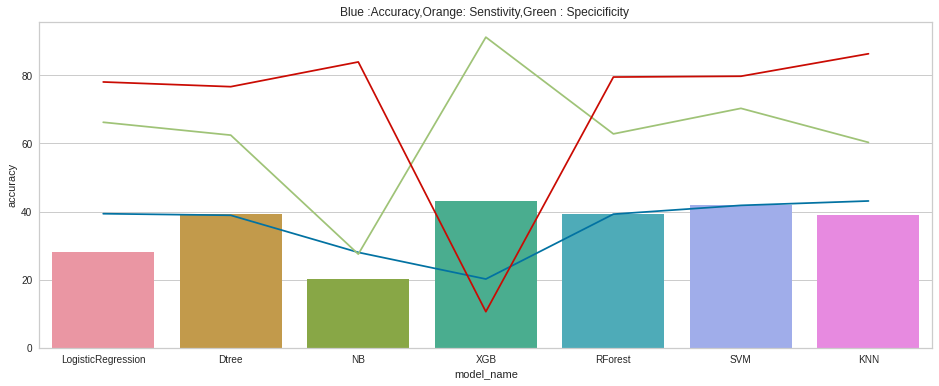

In [0]:
fitModelsAndPredict(models_dict,X_train,y_train,X_test,y_test)

In [0]:
link = 'https://drive.google.com/open?id=1r2LPuNUKy_qMlLzfDnIVdeVZfZrpOngF'
fluff, id = link.split('=')

#downloading the doc2vec model
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('lokiXgb.pkl')
xgbLoki = joblib.load(open('lokiXgb.pkl', 'rb'))

In [0]:
link = 'https://drive.google.com/open?id=1qoqFk7BU_OCMroq_vvcdWDGzm8w-VDmk'
fluff, id = link.split('=')

#downloading the doc2vec model
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('party.pkl')
party = joblib.load(open('party.pkl', 'rb'))

In [0]:
def predict_tVsBScore(title,body):
    # import string
    # from nltk.stem import WordNetLemmatizer
    # from nltk.tokenize import RegexpTokenizer
    # from nltk.corpus import stopwords
    # nltk.download('stopwords')
    # from nltk.stem.porter import PorterStemmer


    stemming = PorterStemmer()
    lemma = WordNetLemmatizer()
    def cleanUp(data):
        data = "".join([i for i in str(data) if i not in string.punctuation])
        tokenizer = RegexpTokenizer(r'\w+')
        data = tokenizer.tokenize(data.lower())
        data = [i for i in data if i not in stopwords.words('english')]
        data = [lemma.lemmatize(i) for i in data]
        data = " ".join([stemming.stem(i) for i in data])
        # print(data)
        return data

    # import re
    def break_subject(text):
        if type(text) is float:
          return []
        import re
        a = re.split('; |, |-',text)
        # print(a)
        return re.split('; |, |-',text)

    cleanedBody = cleanUp(body)
    subject = break_subject(title)

    from nltk.corpus import wordnet 
    def generate_Synonyms(wordlist):
        synonyms = set()
        for i in wordlist:
          if type(i) is not str:
            continue
          for syn in wordnet.synsets(i): 
              for l in syn.lemmas(): 
                  synonyms.add(l.name())
        # print(list(synonyms))
        return list(synonyms)
    def combineSynonyms(data):
        return ' '.join(data)
    

    finalSubject = generate_Synonyms(subject)
    # print(finalSubject)
    finalSubject1 = combineSynonyms(finalSubject)
    # print(finalSubject1)

    s = cleanedBody + '@@' + finalSubject1
    # print(s)

    from sklearn.feature_extraction.text import TfidfVectorizer
    # create the transform
    def cosine_sim(statement):
        statement=statement.split('@@')
        # print(statement)
        text1,text2=statement[0],statement[1]
        vectorizer = TfidfVectorizer(stop_words='english')
        tfidf = vectorizer.fit_transform([text1, text2])
        sim_score=((tfidf * tfidf.T).A)[0,1]
        pred_label = 0
        if sim_score*100>20:
          pred_label = 1
          
        # if sim_score*100>0:
        #   return 1
        return sim_score , pred_label

    import spacy
    
    # Load English tokenizer, tagger, parser, NER and word vectors
    nlp = spacy.load('en')
    def spacy_similarity(t1,t2):
        doc1 = nlp(t1)
        doc2 = nlp(t2)
        return doc1.similarity(doc2)

    
    simScore , label = cosine_sim(s)
    simScore2 = spacy_similarity(cleanedBody,finalSubject1)
    
    return label,simScore2

In [0]:
def FourReal_TitleVsBody(title,statement,barely_true_counts,false_counts,half_true_counts,mostly_true_counts, pants_on_fire_counts,party_affiliation):
  # cosineSim = predict_tVsBScore(title,statement)
  party_affiliation_transform = party.transform([party_affiliation])
  
  df=pd.DataFrame([barely_true_counts])
  df.columns=['barely_true_counts']
  df['false_counts']=false_counts
  df['half_true_counts']=half_true_counts
  df['mostly_true_counts']=mostly_true_counts
  df['pants_on_fire_counts']=pants_on_fire_counts
  df['party affiliation']=party_affiliation_transform
  a,df['cosineSim']=predict_tVsBScore(title,statement)
  
  # barely_true_counts	false_counts	half_true_counts	mostly_true_counts	pants_on_fire_counts	party affiliation	cosineSim	label
  
  prediction = xgbLoki.predict(df)
  prediction_probability = xgbLoki.predict_proba(df)
  return prediction_probability

In [0]:
a = FourReal_TitleVsBody(subject,statement,barely_true_counts,false_counts,half_true_counts,mostly_true_counts, pants_on_fire_counts,party_affiliation)